# MNIST Example in Keras


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist

# x = range(9)
# y = range(9)

# plt.plot(x, y, '-o')
# plt.show()



Using TensorFlow backend.


Image is 5


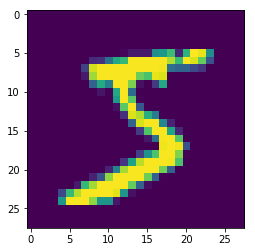

In [32]:
# loading images of the handwritten datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## array representation of hand written image
# x_train[0]

# colored graph representation of hand written image
plt.imshow(x_train[0])
plt.show

## shows that x_train is a 3 dimensional array (# of image, height, width)
# print x_train.shape
# => (60000, 28, 28)

# y_train is the correct label of the image
print 'Image is %d' % y_train[0]
# => 5

# x_test and y_test are used to test accuracy, it is hidden from the training program.


I will build a 3-layer neural network using Keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# sequential aka feed forward, need to know the size of input and output
# **other: recurrent**
model = Sequential()
# Dense is a fully connect hidden layer 
model.add(Dense(300, input_dim=28*28))
# ReLU e.g. dimming lights
model.add(Activation('relu'))
model.add(Dense(50, input_dim=300))
model.add(Activation('relu'))
model.add(Dense(10, input_dim=50))
# Softmax is normalization probability 
model.add(Activation('softmax'))

# # softmax example
# acts = [1, 4, 45, 70, 32]

# sum_exp = 0
# for x in acts:
#     sum_exp += np.exp(x)

# for x in acts:
#     print 'prob:', np.exp(x) / sum_exp
    

Let's train the model!

In [28]:
from keras.optimizers import SGD
from keras.utils import to_categorical

# Destructure the shape of current input data
N, H, W = x_train.shape

# Reshape aka flatten 28*28 2D array to single array 
# 60000 by 784 matrix
# why? easier to calculate and libs require labels to be converted to one-hot representation
# .reshape(rows, cols)
# normalize with 255 (max value of a pixel)
x = x_train.reshape((N, H*W)).astype('float') / 255
y = to_categorical(y_train, num_classes=10)

# Define optimizer (stochastic gradient descent)
# performs update to the parameters
# lr - learning rate
# decay - decay pg the learning rate
# momentum 
sgd = SGD(lr=0.01, decay=1e-4, momentum=0.9)

# setup metrics we care about
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=10, batch_size=50)
# 1 epoch: 60000/50 = 1200 iterations


Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0448 - acc: 0.9855
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0343 - acc: 0.9894
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0257 - acc: 0.9931
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0190 - acc: 0.9953
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0149 - acc: 0.9965
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0119 - acc: 0.9977
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0094 - acc: 0.9985
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0077 - acc: 0.9991
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0065 - acc: 0.9993
Epoch 10/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0058 - acc: 0.9994

Testing the data

In [31]:
# Destructure test data
N, H, W = x_test.shape

x = x_test.reshape((N, H*W)).astype('float') / 255
y = to_categorical(y_test, num_classes=10)

test_loss, test_acc = model.evaluate(x, y, batch_size=50)
print 'Accuracy on test data %f' % test_acc

10000/10000 [==============================] - 0s 19us/step
Accuracy on test data 0.978700
